<a href="https://colab.research.google.com/github/N333l/AIML/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'red-wine-quality-cortez-et-al-2009' dataset.
Dataset shape (after sampling): (150, 12)
Mean square error: 0.6444444444444445
R square: 0.18345628806490336


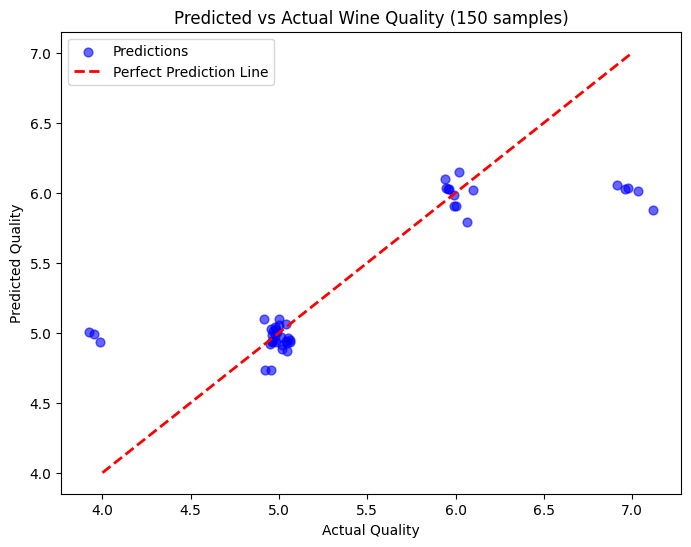

In [ ]:
#neel joshi 20230802472
import kagglehub, os, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt


path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")
df = pd.read_csv(os.path.join(path, "winequality-red.csv"))


df = df.head(150)
print("Dataset shape (after sampling):", df.shape)


df["good_wine"] = (df["quality"] >= 6).astype(int)
X = df.drop(["quality", "good_wine"], axis=1)
y = df["good_wine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
print("Mean square error:", accuracy_score(y_test, clf.predict(X_test)))


X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R square:", mean_squared_error(y_test, y_pred))


plt.figure(figsize=(8,6))
plt.scatter(y_test + np.random.normal(0,0.05,len(y_test)),  # jitter on x
            y_pred,
            alpha=0.6,
            s=40,
            c="blue",
            label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual Wine Quality (150 samples)")
plt.legend()
plt.show()
